<a href="https://colab.research.google.com/github/esrayuzgec/parkinsonvsalz/blob/main/ADCNPD_Convnext_Train_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
!pip install timm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer

In [4]:

path = Path('/content/gdrive/MyDrive/3_cls')

In [5]:
path.ls()


(#12) [Path('/content/gdrive/MyDrive/3_cls/train'),Path('/content/gdrive/MyDrive/3_cls/test'),Path('/content/gdrive/MyDrive/3_cls/alzparkinson_2cls.pth'),Path('/content/gdrive/MyDrive/3_cls/parkinsonCN_resnet18_1.pth'),Path('/content/gdrive/MyDrive/3_cls/parkinsonCN_resnet18_1'),Path('/content/gdrive/MyDrive/3_cls/parkinsonCN_resnet18_1.pkl'),Path('/content/gdrive/MyDrive/3_cls/pdCNVGG16_1.pth'),Path('/content/gdrive/MyDrive/3_cls/pdCNVGG16_1.pkl'),Path('/content/gdrive/MyDrive/3_cls/PADCN_convnext.pth'),Path('/content/gdrive/MyDrive/3_cls/PADCN_convnext.pkl')...]

In [6]:
item_tfms = Resize(224)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [7]:

train_fnames=get_image_files(path/'train')

In [17]:

dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.2),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )

In [18]:
dls = dblock.dataloaders(path,bs=32)


In [19]:
dls.c,len(dls.train_ds),len(dls.valid_ds)


(3, 6272, 1567)

In [20]:
dls.vocab


['AD', 'CONTROL', 'PD']

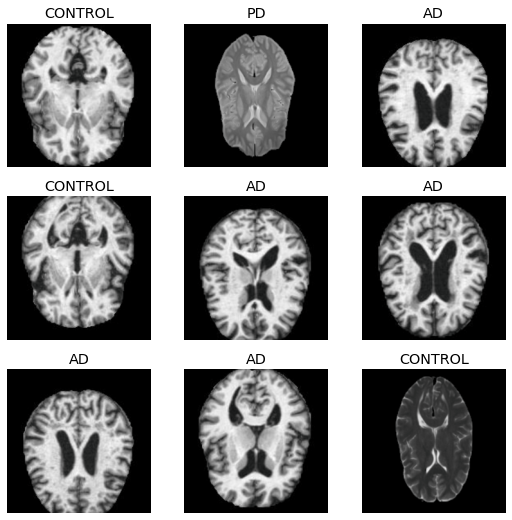

In [21]:
dls.show_batch()


In [22]:
timm.list_models('convnext*')


['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [23]:
learn= vision_learner(dls,'convnext_small_in22k',metrics=accuracy)


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f555908d700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f555908d700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

SuggestedLRs(valley=0.001737800776027143)

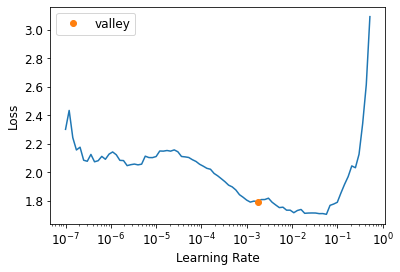

In [24]:
learn.lr_find()


In [25]:
learn.fit_one_cycle(100,1.8e-3)


epoch,train_loss,valid_loss,accuracy,time
0,1.140010,0.788549,0.695597,09:54
1,1.015098,0.664884,0.727505,02:55
2,0.852384,0.631834,0.745373,02:54
3,0.741604,0.540055,0.762604,02:54
4,0.631846,0.480386,0.790045,02:54
5,0.597287,0.464815,0.805361,02:54
6,0.515975,0.474004,0.792597,02:54
7,0.481797,0.391768,0.828334,02:54
8,0.476312,0.384814,0.817486,02:54
9,0.410829,0.341093,0.856414,02:54


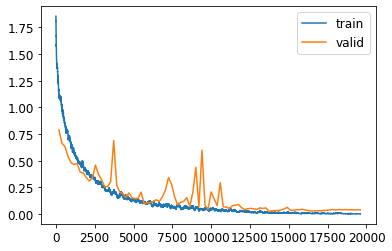

In [26]:
learn.recorder.plot_loss()

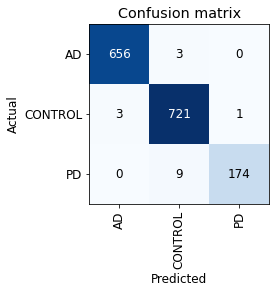

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [28]:
learn.save(path/'ADCNPD_Convnext_trainson')

Path('/content/gdrive/MyDrive/3_cls/ADCNPD_Convnext_trainson.pth')

In [29]:
learn.export(path/'ADCNPD_Convnext_trainson.pkl')

In [30]:
interp.print_classification_report()


              precision    recall  f1-score   support

          AD       1.00      1.00      1.00       659
     CONTROL       0.98      0.99      0.99       725
          PD       0.99      0.95      0.97       183

    accuracy                           0.99      1567
   macro avg       0.99      0.98      0.99      1567
weighted avg       0.99      0.99      0.99      1567



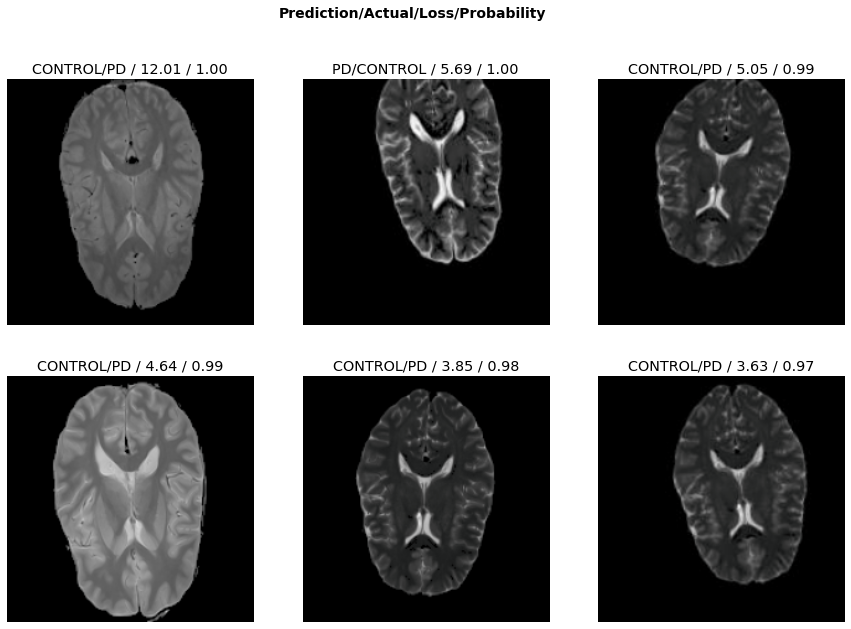

In [31]:
interp.plot_top_losses(6, figsize=(15,10))


In [32]:
all_files= get_image_files(path)


In [33]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                 get_y=parent_label,
                 
                 item_tfms = Resize(224),
                 batch_tfms =[Normalize.from_stats(*imagenet_stats)]
              
                 
)

In [34]:
dls_test = dblock.dataloaders(all_files)


In [35]:
print("Number of examples in testing:", len(dls_test.valid_ds))


Number of examples in testing: 1362


In [36]:
learn1 = vision_learner(dls_test, 'convnext_small_in22k', metrics=accuracy).load('/content/gdrive/MyDrive/3_cls/ADCNPD_Convnext_trainson')


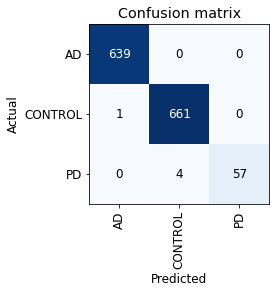

In [37]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [38]:
preds, targs = learn1.tta()
accuracy(preds, targs).item()

0.9955947399139404